In [1]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#upload file from the path and saving it as data
data = pd.read_csv("C:/Users/surya/anaconda3/FILES_CSV/Assignments/SIMPLE_LIN_REGRESSION/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
#eda - getting information about each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
#checking any duplicate row
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [5]:
#describing the data
print(data['Salary'].describe())


count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64


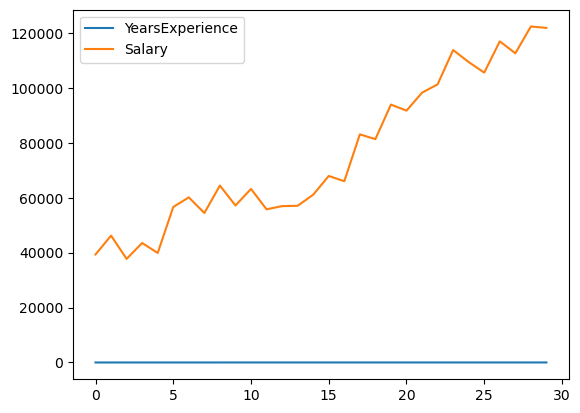

In [6]:
#plotting graph
data.plot()
plt.show()

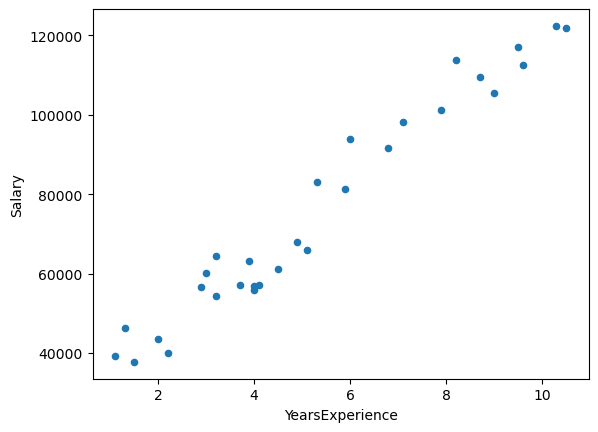

In [7]:
#scatter plot
data.plot(kind = 'scatter', x = 'YearsExperience', y = 'Salary')

plt.show()

In [8]:
#Model building
import statsmodels.formula.api as smf

model = smf.ols("Salary~YearsExperience",data = data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        11:08:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
Bo, B1 = model.params
print("Intercept, Bo: ", Bo)
print("YearsExperience, B1: ", B1)


tvalue, pvalue = (model.tvalues, model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)


r_sq, r_sq_adj = (model.rsquared, model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  25792.200198668703
YearsExperience, B1:  9449.962321455077
tvalue:  Intercept          11.346940
YearsExperience    24.950094
dtype: float64
pvalue:  Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64
R2:  0.9569566641435086
R2_Adj:  0.9554194021486339


In [10]:
predicted_salary = model.predict(data.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : data.Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788


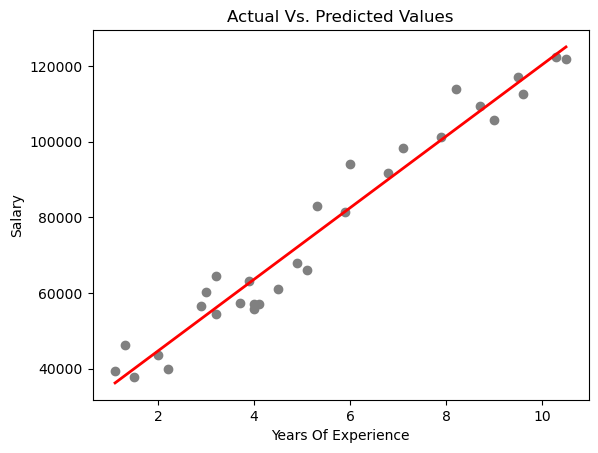

In [11]:
plt.scatter(data.YearsExperience, data.Salary,  color='gray')
plt.plot(data.YearsExperience, predicted_salary, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [12]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data.Salary, predicted_salary))  
print('Mean Squared Error:', metrics.mean_squared_error(data.Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.Salary, predicted_salary)))
print("R^2 Score :          ", metrics.r2_score(data.Salary, predicted_salary))

Mean Absolute Error: 4644.20128944354
Mean Squared Error: 31270951.72228097
Root Mean Squared Error: 5592.043608760662
R^2 Score :           0.9569566641435086


p-value from the test: below 0.05 generally means non-normal: 0.4279759880058132
Residuals are normally distributed


C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


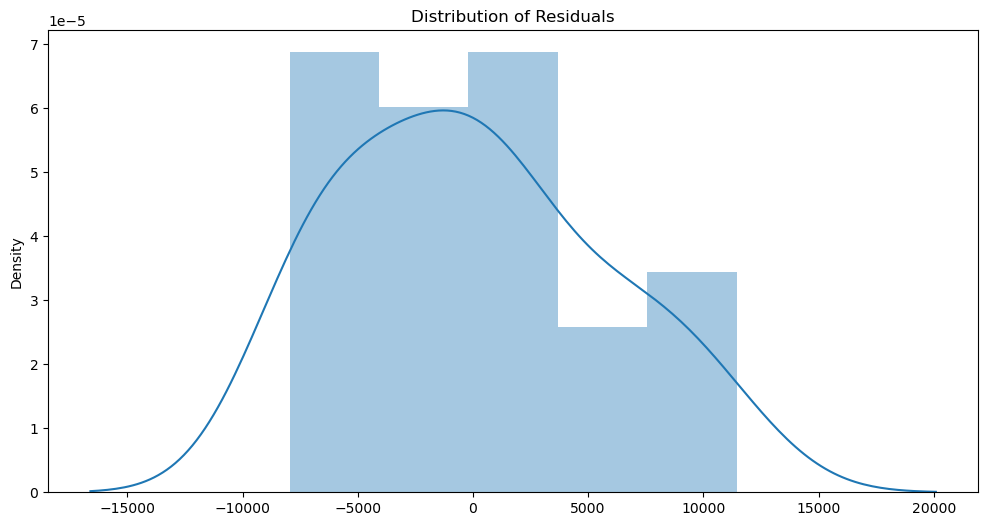

In [13]:
from statsmodels.stats.diagnostic import normal_ad
residuals = data.Salary - predicted_salary
p_value_thresh=0.05

p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')


plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [14]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        11:08:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#assuming YearsExperience in x
x = data.iloc[:, :-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [16]:
y = data.iloc[:, 1].values
y #assuming Salary in y


array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [23]:
# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * np.log(X) + np.random.randn(100, 1)  # applying logarithmic transformation


In [17]:
#import train test split method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/3, random_state=0)

In [24]:
# Define the transformation function
log_transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

In [25]:
# Create the transformed linear regression model
model = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=log_transformer
)

In [27]:
# Fit the model
model.fit(x_train, y_train)

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                           inverse_func=<ufunc 'exp'>))

In [29]:
# Make predictions
y_pred = model.predict(x_test)

In [18]:
#it is a data which contains 1column and 1row so variables can be tretaed using SLR
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [19]:
#giving x test(years of exp) values to predict salary because salary depends on years of exp
y_pred = regressor.predict(x_test)


In [30]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 60894168.38831059


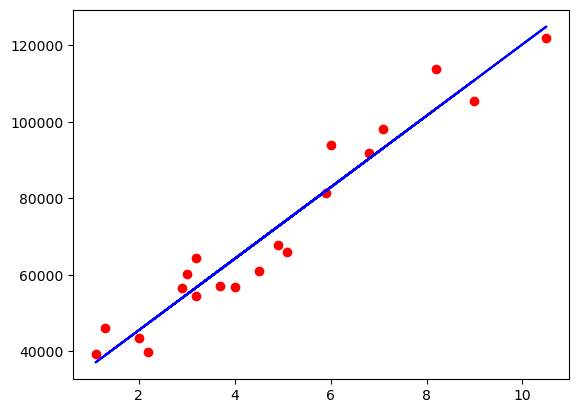

In [20]:
# as plot shows when x incs y also increases
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')

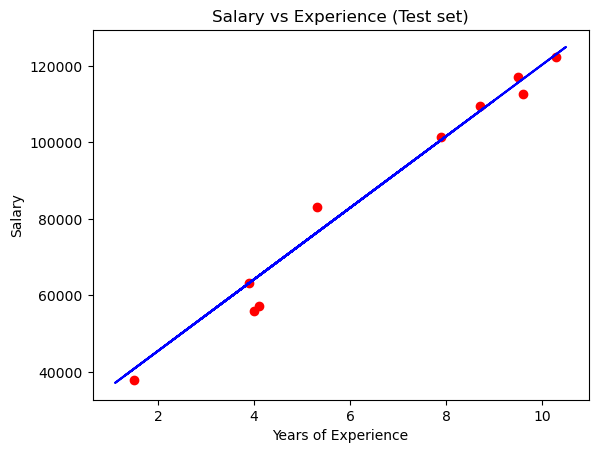

In [21]:
#scatter plot for test variables
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [22]:
#shows the actual test values given to y_pred for X_test values and predicted variables using SLR
pd.DataFrame({'Actual_Test':y_test ,'Predicted':y_pred})
#Predicted shows the predicted salary by the model for the values aginst x_test 

,Actual_Test,Predicted
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545
